Matias Medrano Ascencio

Jueves 14 de septiembre del 2023

# Tarea - Ajuste de curvas

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [53]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

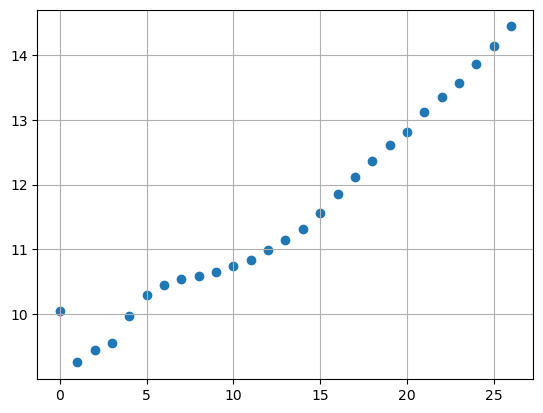

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
m = 27
x = np.linspace(0 ,26 ,m)

plt.figure()
plt.scatter(x, y)
plt.grid()

In [55]:
import scipy.optimize as opt

def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#Lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args = (X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack((ones, x_factor, x2_factor))
sol2 = opt.minimize(funcion_de_costo, beta, args = (X2, y_vector))

#Cúbica b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack((ones, x_factor, x2_factor, x3_factor))
sol3 = opt.minimize(funcion_de_costo, beta, args = (X3, y_vector))

In [56]:
sol1.x

array([9.11567634, 0.18667055])

In [57]:
sol2.x

array([9.59128648e+00, 7.25241227e-02, 4.39024738e-03])

In [58]:
sol3.x

array([9.56567851e+00, 8.52062968e-02, 3.15995553e-03, 3.13901573e-05])

In [59]:
def f1(x):
    return 9.11567634 + 0.18667055*x
def f2(x):
    return 9.59128648e+00 + 7.25241227e-02*x + 4.39024738e-03*x**2
def f3(x):
    return 9.56567851e+00 +  8.52062968e-02*x +3.15995553e-03*x**2 + 3.13901573e-05*x**3

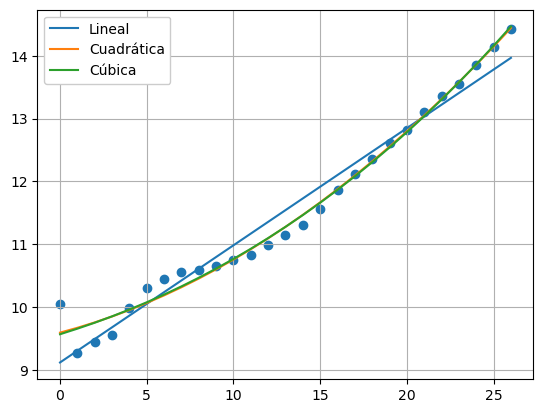

In [60]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f1(x), label = "Lineal")
plt.plot(x, f2(x), label = "Cuadrática")
plt.plot(x, f3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

**1.**

In [94]:
import pandas as pd
data=pd.read_csv("population_data.csv")
poblacion=np.array(data["Poblacion"])

In [119]:
m = 66
x = np.linspace(0,65,m)

In [99]:
ones = np.ones([m,1])
x_factor = np.reshape(x,[m,1])
X1 = np.hstack((ones,x_1))
beta_inicial_1 = np.random.rand(2)
y_vector = np.reshape(poblacion, [m, 1])


x2_factor = np.reshape(x**2,[m,1])
X2 = np.hstack((ones,x_1,x_2))
beta_inicial_2 = np.random.rand(3)

x3_factor = np.reshape(x**3,[m,1])
X3 = np.hstack((ones,x_1,x_2,x_3))
beta_inicial_3= np.random.rand(4)


sol1 = opt.minimize(funcion_de_costo, beta, args = (X, y_vector))
sol2 = opt.minimize(funcion_de_costo, beta, args = (X2, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta, args = (X3, y_vector))

In [90]:
sol1.x

array([24138.02999969,  1543.97308282])

In [91]:
sol2.x

array([2.44255960e+04, 1.51701299e+03, 4.14774527e-01])

In [92]:
sol3.x

array([ 2.84777567e+04,  7.39079719e+02,  3.05648382e+01, -3.09231446e-01])

In [120]:
def f1(x):
    return 24138.02999969 + 1543.97308282*x
def f2(x):
    return 2.44255960e+04 + 1.51701299e+03*x + 4.14774527e-01*x**2
def f3(x):
    return 2.84777567e+04 +  7.39079719e+02*x + 3.05648382e+01*x**2 - 3.09231446e-01*x**3

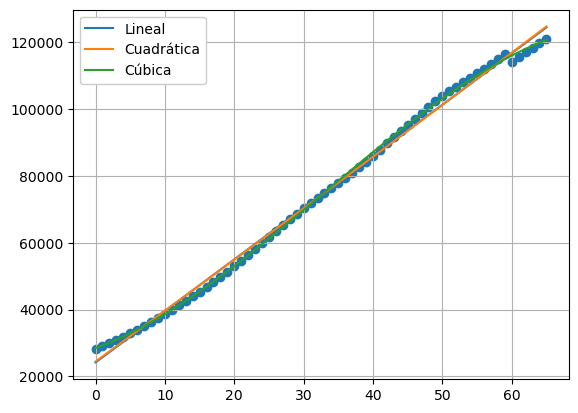

In [121]:
plt.figure()
plt.scatter(x, poblacion)
plt.grid()
plt.plot(x, f1(x), label = "Lineal")
plt.plot(x, f2(x), label = "Cuadrática")
plt.plot(x, f3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

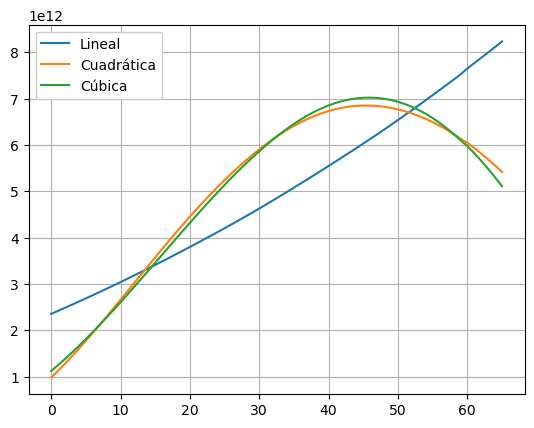

In [113]:
x = np.linspace(0,65,m)
def y1(x):
    return (f1(x) - poblacion)**2
def y2(x):
    return (f2(x) - poblacion)**2
def y3(x):
    return (f3(x) - poblacion)**2

plt.figure()
plt.grid()
plt.plot(x, y1(x), label = "Lineal")
plt.plot(x, y2(x), label = "Cuadrática")
plt.plot(x, y3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

Errores según término con cada polinomio.

**2.**

In [96]:
nacimientos = np.array(data["Nacimientos"])

In [97]:
m = 66
x = np.linspace(0,65,m)

In [103]:
ones = np.ones([m,1])
x_factor = np.reshape(x,[m,1])
X1 = np.hstack((ones,x_1))
beta_inicial_1 = np.random.rand(2)
y_vector = np.reshape(nacimientos, [m, 1])


x2_factor = np.reshape(x**2,[m,1])
X2 = np.hstack((ones,x_1,x_2))
beta_inicial_2 = np.random.rand(3)

x3_factor = np.reshape(x**3,[m,1])
X3 = np.hstack((ones,x_1,x_2,x_3))
beta_inicial_3= np.random.rand(4)


sol1 = opt.minimize(funcion_de_costo,beta_inicial_1,args=(X1,y_vector,2))
sol2 = opt.minimize(funcion_de_costo,beta_inicial_2,args=(X2,y_vector,3))
sol3 = opt.minimize(funcion_de_costo,beta_inicial_3,args=(X3,y_vector,4))

In [104]:
sol1.x

array([1563883.60318477,   21955.99642906])

In [105]:
sol2.x

array([ 1.02112582e+06,  7.27774682e+04, -7.81559051e+02])

In [106]:
sol3.x

array([ 1.08856049e+06,  5.98442062e+04, -2.80493053e+02, -5.13814371e+00])

In [117]:
def f1(x):
    return 1563883.60318477 + 21955.99642906*x
def f2(x):
    return 1.02112582e+06 + 7.27774682e+04*x -7.81559051e+02*x**2
def f3(x):
    return 1.08856049e+06 +  5.98442062e+04*x - 2.80493053e+02*x**2 - 5.13814371e+00*x**3

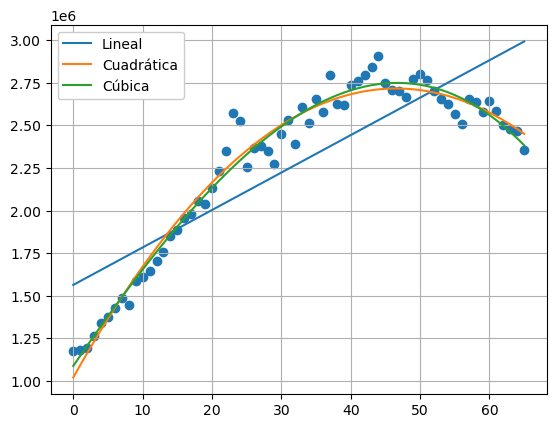

In [108]:
plt.figure()
plt.scatter(x, nacimientos)
plt.grid()
plt.plot(x, f1(x), label = "Lineal")
plt.plot(x, f2(x), label = "Cuadrática")
plt.plot(x, f3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

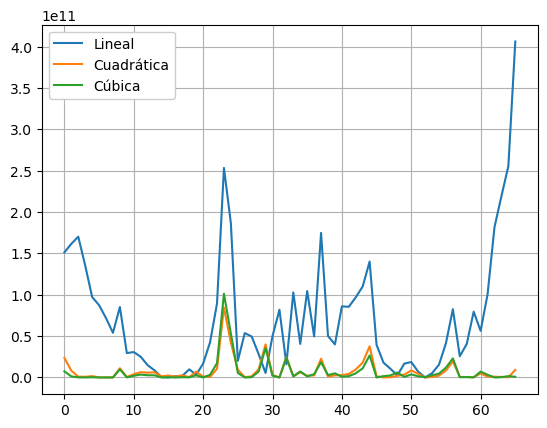

In [118]:
x = np.linspace(0,65,m)
def y1(x):
    return (f1(x) - nacimientos)**2
def y2(x):
    return (f2(x) - nacimientos)**2
def y3(x):
    return (f3(x) - nacimientos)**2

plt.figure()
plt.grid()
plt.plot(x, y1(x), label = "Lineal")
plt.plot(x, y2(x), label = "Cuadrática")
plt.plot(x, y3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

Errores según término con cada polinomio.